In [1]:
from ontopy import get_ontology
#import networkx as nx
#import plotly.graph_objects as go
from ontopy.graph import OntoGraph, cytoscapegraph
#import pydotplus
#import ipycytoscape
#import ipywidgets as widgets

In [2]:
onto = get_ontology('emmo-inferred').load()

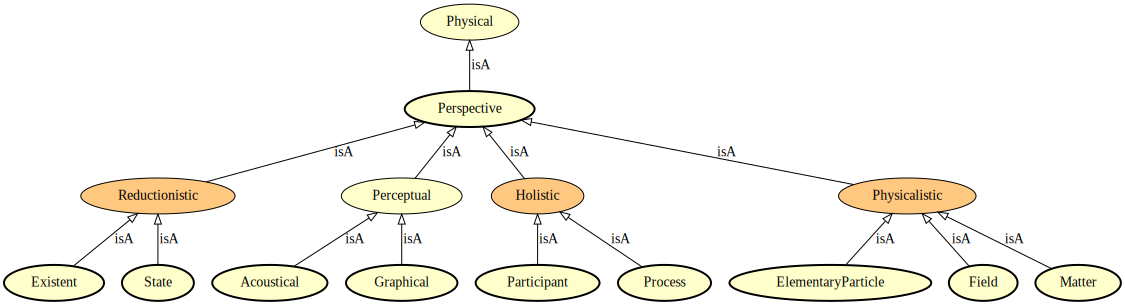

In [6]:
leaves = set()
for s in onto.Perspective.subclasses():
    leaves.update(s.subclasses())
graph = OntoGraph(onto, onto.Perspective, leaves=leaves, parents=1, edgelabels=True)

graph.dot
#graph = OntoGraph(onto, onto.isA, leafs=('Physical',))
#digraph = graph.dot
#graph.get_edges()
#[print(g) for g in G.nodes()]

In [12]:
cytograph = cytoscapegraph(graph, onto=onto, infobox='right')
display(cytograph)

GridspecLayout(children=(CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'nod…

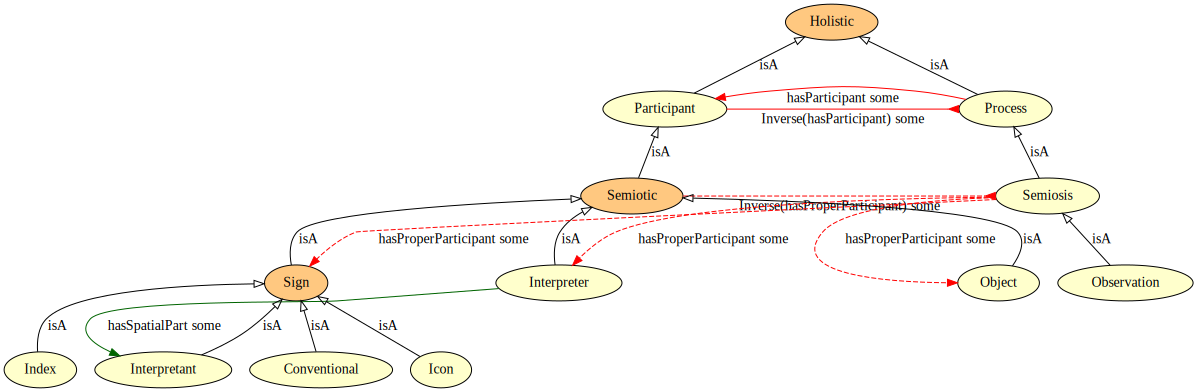

In [8]:
leafs = {onto.Interpreter, onto.Conventional, onto.Icon, onto.Observation,
         onto.Object}
hidden = {onto.SIUnitSymbol, onto.SpecialUnit, onto.Manufacturing,
          onto.Engineered, onto.PhysicalPhenomenon}
semiotic = onto.get_branch(onto.Holistic, leafs=leafs.union(hidden))
semiotic.difference_update(hidden)
g = OntoGraph(onto)
g.add_entities(semiotic, relations='all', edgelabels=True)
g.dot

In [9]:
cytograph2 = cytoscapegraph(g, onto=onto, infobox='right')
display(cytograph2)

GridspecLayout(children=(CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'nod…